In [4]:
# Notebook for doing some image manipulation with calibration data
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np

# Some figures paths and options
figures_path = "./figures/"
try:
    os.mkdir(figures_path)
except OSError as error:
    print('The directory already exists')

The directory already exists


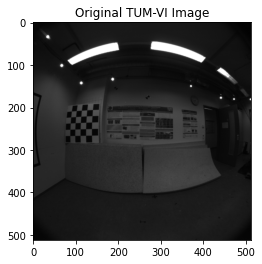

In [5]:
# Image path
img_path = "/home/benjin/Development/wcs/intrinsics/logs/notebooks/1520531124150444163.png"

img_dist = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Show the original distorted image
plt.title('Original TUM-VI Image')
plt.imshow(cv2.cvtColor(img_dist, cv2.COLOR_GRAY2RGB))
plt.show()

In [6]:
# Camera intrinsics
K = np.zeros([3,3])
K[0][0] = 190.97847715128717
K[1][1] = 190.9733070521226
K[0][2] = 254.93170605935475
K[1][2] = 256.8974428996504
K[2][2] = 1.0

# Distortion parameters - equidistant
d = np.zeros([4,1])
d[0] = 0.0034823894022493434
d[1] = 0.0007150348452162257
d[2] = -0.0020532361418706202
d[3] = 0.0002029367359

# Image dimensions
img_height = 512
img_width = 512

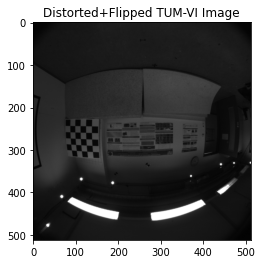

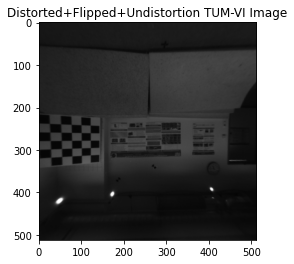

In [7]:
# Experiment 1: flipped distorted image + undistort with original calibration parameters
#*****************************************************************************************
img_dist_flip = cv2.flip(img_dist, 0)

# Undistort the image with the original calibration parameters
img_dist_flip_undist = cv2.fisheye.undistortImage(distorted=img_dist_flip, K=K, D=d, Knew=K)

# Show the distorted flipped image
plt.title('Distorted+Flipped TUM-VI Image')
plt.imshow(cv2.cvtColor(img_dist_flip, cv2.COLOR_GRAY2RGB))
plt.show()

# Show the distorted flipped image plus undistortion
plt.title('Distorted+Flipped+Undistortion TUM-VI Image')
plt.imshow(cv2.cvtColor(img_dist_flip_undist, cv2.COLOR_GRAY2RGB))
plt.show()

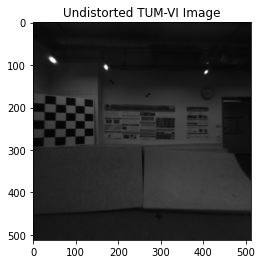

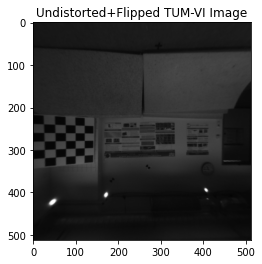

In [8]:
# Experiment 2: undistort image + flip image
#*****************************************************************************************
# Undistort the image with the original calibration parameters
img_undist = cv2.fisheye.undistortImage(distorted=img_dist, K=K, D=d, Knew=K)

# Flip the image vertically
img_undist_flip = cv2.flip(img_undist, 0)

# Show the undistorted image
plt.title('Undistorted TUM-VI Image')
plt.imshow(cv2.cvtColor(img_undist, cv2.COLOR_GRAY2RGB))
plt.show()

# Show the distorted flipped image plus undistortion
plt.title('Undistorted+Flipped TUM-VI Image')
plt.imshow(cv2.cvtColor(img_undist_flip, cv2.COLOR_GRAY2RGB))
plt.show()

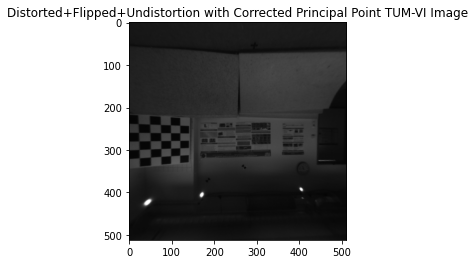

In [9]:
# Experiment 3: flipped distorted image + undistort with corrected principal point
#*****************************************************************************************
img_dist_flip = cv2.flip(img_dist, 0)

# Undistort the image with the original calibration parameters
# We need to update the principal point in case the principal point was not in the middle of the image
K2 = np.zeros([3,3])
K2[0][0] = K[0][0]
K2[1][1] = K[1][1]
K2[0][2] = img_width-K[0][2]
K2[1][2] = img_height-K[1][2]
K2[2][2] = 1.0

img_dist_flip_undist_2 = cv2.fisheye.undistortImage(distorted=img_dist_flip, K=K2, D=d, Knew=K2)

# Show the distorted flipped image plus undistortion
plt.title('Distorted+Flipped+Undistortion with Corrected Principal Point TUM-VI Image')
plt.imshow(cv2.cvtColor(img_dist_flip_undist_2, cv2.COLOR_GRAY2RGB))
plt.show()

In [10]:
# Compute the sum of all pixel values in an image
def compute_sum_pixel_values(img):
    
    value = 0.0
    num_pixels = img.shape[0]*img.shape[1]
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            value += img[i][j]
            
    return value/num_pixels

Error Experiment 1 [gray values/pixel]:  1.5736770629882812
Error Experiment 2 [gray values/pixel]:  1.2895088195800781


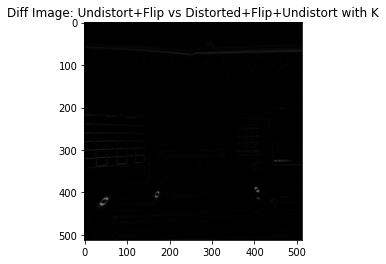

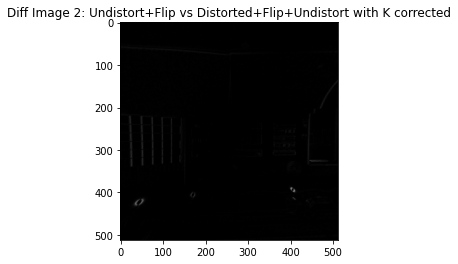

True

In [12]:
# Compute difference between the two images from the experiments above
img_diff = cv2.absdiff(img_dist_flip_undist, img_undist_flip)
img_diff_2 = cv2.absdiff(img_dist_flip_undist_2, img_undist_flip)

print('Error Experiment 1 [gray values/pixel]: ', compute_sum_pixel_values(img_diff))
print('Error Experiment 2 [gray values/pixel]: ', compute_sum_pixel_values(img_diff_2))

plt.title('Diff Image: Undistort+Flip vs Distorted+Flip+Undistort with K')
plt.imshow(cv2.cvtColor(img_diff, cv2.COLOR_GRAY2BGR))
plt.show()

plt.title('Diff Image 2: Undistort+Flip vs Distorted+Flip+Undistort with K corrected')
plt.imshow(cv2.cvtColor(img_diff_2, cv2.COLOR_GRAY2BGR))
plt.show()

# Save images to disk
cv2.imwrite(figures_path + 'img_dist_flip_undist.png', img_dist_flip_undist)
cv2.imwrite(figures_path + 'img_undist_flip.png', img_undist_flip)
cv2.imwrite(figures_path + 'img_dist_flip_undist2.png', img_dist_flip_undist_2)
cv2.imwrite(figures_path + 'img_diff.png', img_diff)
cv2.imwrite(figures_path + 'img_diff_2.png', img_diff_2)